In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
import numpy
import netCDF4

In [2]:
OM4p25dir = '/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod'
OM4p5dir = '/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle200/gfdl.ncrc4-intel16-prod'
OM4p5edir = '/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle500/gfdl.ncrc4-intel16-prod'
OM4p5ndir = '/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_p25config/gfdl.ncrc4-intel16-prod'
file = 'pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc'
def dmget(paths,file):
    args = ''
    for path in paths: args = args + ' ' + path + '/' + file
    !dmget {args}
dmget( [OM4p25dir, OM4p5dir, OM4p5ndir], file )

In [3]:
OM4p25 = netCDF4.Dataset(OM4p25dir + '/' + file)
OM4p5 = netCDF4.Dataset(OM4p5dir + '/' + file)
OM4p5e = netCDF4.Dataset(OM4p5edir + '/' + file)
OM4p5n = netCDF4.Dataset(OM4p5ndir + '/' + file)

In [13]:
def vmo_at_rapid(vmo_nc_file, lat_rapid=26.5):
    vmo = vmo_nc_file.variables['vmo']
    vml = vmo_nc_file.variables['vhml']
    lons = vmo_nc_file.variables[ vmo.dimensions[-1] ][:]
    i0 = numpy.argmin( numpy.abs(lons+100) )
    i1 = numpy.argmin( numpy.abs(lons-0) )
    lats = vmo_nc_file.variables[ vmo.dimensions[-2] ][:]
    j = numpy.argmin( numpy.abs(lats-lat_rapid) )
    if lats[j]>lat_rapid: j -= 1
    vmoS = (vmo[0,:,j,i0:i1]-vml[0,:,j,i0:i1]).sum(axis=-1)
    vmoN = (vmo[0,:,j+1,i0:i1]-vml[0,:,j,i0:i1]).sum(axis=-1)
    wght = lats[j] - lat_rapid
    vmo = ( wght * vmoN + (1-wght) * vmoS ).filled(0.)
    print( vmo.sum() )
    nk = vmo.shape[0]
    psi = numpy.zeros( nk+1 )
    for k in range(nk,0,-1):
        psi[k-1] = psi[k] - vmo[k-1]
    return psi/1035e6
z_i = OM4p25.variables['z_i'][:].filled(0.)
psi_OM4p25 =  vmo_at_rapid(OM4p25)
psi_OM4p5 =  vmo_at_rapid(OM4p5)
psi_OM4p5e =  vmo_at_rapid(OM4p5e)
psi_OM4p5n =  vmo_at_rapid(OM4p5n)

-1137767200.0
-1067907700.0
-1097284500.0
-1264281200.0


In [5]:
# moc980 = netCDF4.Dataset('data/amoc-rapid/moc_atl_980_bottom_26_5N.nc')
# moc986 = netCDF4.Dataset('data/amoc-rapid/moc_atl_986_26_5N.nc')
# moc987 = netCDF4.Dataset('data/amoc-rapid/moc_atl_987_bottom_26_5N.nc')
rapid = netCDF4.Dataset('data/amoc-rapid/moc_vertical_ave_2004_2015.nc')
# depth = numpy.unique( moc980.variables['Z_L_bnds'][:].flatten() )

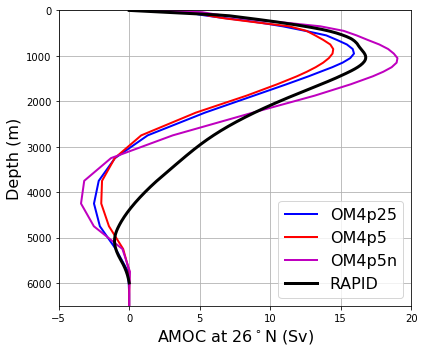

In [6]:
plt.figure(figsize=(6,5))
ax = plt.subplot(111)

lw,fs = 2,16
plt.plot(psi_OM4p25, z_i, 'b-', linewidth=lw, label='OM4p25')
plt.plot(psi_OM4p5, z_i, 'r-', linewidth=lw, label='OM4p5')
# plt.plot(psi_OM4p5e, z_i, 'g-', linewidth=lw, label='OM4p5e')
plt.plot(psi_OM4p5n, z_i, 'm-', linewidth=lw, label='OM4p5n')
plt.plot(rapid.variables['MOC_AVE'][:], rapid.variables['DEPTH'][:], 'k', label='RAPID',
         linewidth=lw+1)

plt.xlim(-5,20)
plt.ylim(6500,0)
plt.legend(loc='lower right', fontsize=fs);
plt.xlabel('AMOC at 26$^\circ$N (Sv)', fontsize=fs)
plt.ylabel('Depth (m)', fontsize=fs)

plt.grid()

plt.tight_layout()

plt.savefig('amoc-rapid.png')

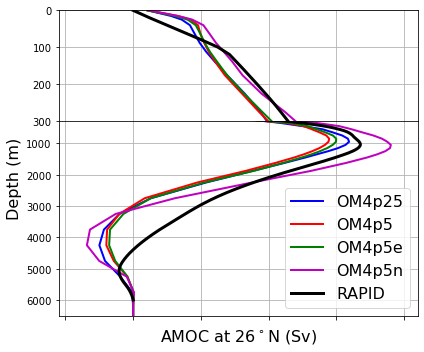

In [7]:
# plt.figure(figsize=(6,5))
# lw,fs,zsplit = 2,16,300

# ax = plt.gca()
# ax.plot(psi_OM4p25, z_i, 'b-', linewidth=lw, label='OM4p25')
# ax.plot(psi_OM4p5, z_i, 'r-', linewidth=lw, label='OM4p5')
# ax.plot(psi_OM4p5e, z_i, 'g-', linewidth=lw, label='OM4p5e')
# ax.plot(psi_OM4p5n, z_i, 'm-', linewidth=lw, label='OM4p5n')
# ax.plot(rapid.variables['MOC_AVE'][:], rapid.variables['DEPTH'][:], 'k', label='RAPID',
#          linewidth=lw+1)
# ax.set_xlim(-5.5,21)
# ax.set_ylim(zsplit,0)
# ax.set_xticklabels(''); # Remove labels to make space
# ax.grid()

# divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
# ax2 = divider.append_axes("bottom", size=2.7, sharex=ax)
# ax2.plot(psi_OM4p25, z_i, 'b-', linewidth=lw, label='OM4p25')
# ax2.plot(psi_OM4p5, z_i, 'r-', linewidth=lw, label='OM4p5')
# ax2.plot(psi_OM4p5e, z_i, 'g-', linewidth=lw, label='OM4p5e')
# ax2.plot(psi_OM4p5n, z_i, 'm-', linewidth=lw, label='OM4p5n')
# ax2.plot(rapid.variables['MOC_AVE'][:], rapid.variables['DEPTH'][:], 'k', label='RAPID',
#          linewidth=lw+1)
# ax2.set_xlim(-5.5,21)
# ax2.set_ylim(6500,zsplit)
# ax2.grid()
# # ax2.set_xticklabels([-5,0,5,10,15]); # Remove labels to make space

# plt.legend(loc='lower right', fontsize=fs);
# plt.xlabel('AMOC at 26$^\circ$N (Sv)', fontsize=fs)
# plt.ylabel('                Depth (m)', fontsize=fs)


# plt.tight_layout()

# plt.savefig('amoc-rapid.pdf')